# Pytorch: для чего и зачем?

`Pytorch` библиотека для *Python*, позволяющая писать программы, вычисляемые на различных типах процессоров (CPU, GPU, TPU). Поддерживает работу с многомерными типами данных.

`Pytorch` отлично подходит для решения задач машинного обучения, в частности для работ с нейросетевыми алгоритмами. Однако, в явном виде не существует никаких ограничений по использованию `pytorch` в программировании. Его также можно применять для оптимизации вычислений больших объемов данных, а именно переноса вычислений с CPU на GPU. 

`Pytorch` очень популярен и имеет за собой большое сообщество. По следующему изображению можно оценить рост популярности данной библиотеки с течением времени в сравнении с `Tensorflow` (альтернатива `pytorch`). Данный рост популярности можно объяснить простотой изучения библиотеки, гибокстью и постоянным развитием проекта. `Pytorch` предлаегает большой набор различных функций, который аргончино смотрятся в `Python`.

![Trends](./imgs/Trends.png)

# Установка

[Официальная инструкция по установке `Pytorch`](https://pytorch.org/get-started/locally/)

[nvidia-docker образ с `Pytorch` на борту](https://docs.nvidia.com/deeplearning/frameworks/pytorch-release-notes/running.html#running)

[Google Colaboratory](https://colab.research.google.com/) - в колаборатории также установлен pytorch если по каким-либо причинам вы не можете установить и использова `pytorch` у себя

[Kaggle](https://www.kaggle.com/) - является в некотором роде аналогом *"google colaboratory"*.  Также предоставляет доступ к GPU и имеет ряд предустановленных библиотек (включая `pyotrch`). Кроме того позволяет оперативно использовать наборы данных из самого *kaggle*, и имеет более удобный инструмент наблюдения за доступностью GPU.

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision

import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'1.9.0a0+2ecb2c7'

# Основы Pytorch

## Тензоры

АПИ предлагаемое `pytorch` очень похоже на таковое в `numpy`

In [2]:
torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])

tensor([4., 1., 5., 3., 2., 1.])

In [3]:
a = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
a, a.shape, a[0, 1]

(tensor([[4., 1.],
         [5., 3.],
         [2., 1.]]),
 torch.Size([3, 2]),
 tensor(1.))

In [4]:
torch.ones(3)

tensor([1., 1., 1.])

In [5]:
torch.rand(3, 3)

tensor([[0.8483, 0.9757, 0.0527],
        [0.1782, 0.3628, 0.6692],
        [0.6240, 0.1950, 0.3186]])

`pyotrch` тензоры также можно легко конвертировать в `np.ndarray` и из него, используя методы `numpy()` и `from_numpy()` соответсвенно.

In [6]:
a = np.zeros((3, 3))
torch.from_numpy(a)  # Возвращает pytorch.Tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [7]:
a = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
a.numpy()  # Возвращает np.ndarray

array([4., 1., 5., 3., 2., 1.], dtype=float32)

Для чтения и сохранения данных также как и в `numpy` используются функции `save()` и `load()`

In [8]:
torch.save(a, 'tensor.pt')

In [9]:
torch.load('tensor.pt')

tensor([4., 1., 5., 3., 2., 1.])

Для тензоров также можно вычислять среднее, дисперсию и прочее, также как в `numpy`. 

**Однако в отличие** от `numpy` ось указывается параметром `dim`, а не `axis`.

In [10]:
a.mean(), a.std(), a.var()

(tensor(2.6667), tensor(1.6330), tensor(2.6667))

In [11]:
torch.mean(a), torch.std(a), torch.var(a)

(tensor(2.6667), tensor(1.6330), tensor(2.6667))

In [12]:
torch.mean(a, dim=0)

tensor(2.6667)

# Игрушечный пример

## Задача

Есть некоторый набор данных, для которого нужно построить регрессионную модель

## Данные

In [13]:
x_data = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]  # Значения некоторого признака
y_data = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]  # Регрессируемое значение

Text(0, 0.5, 'Y')

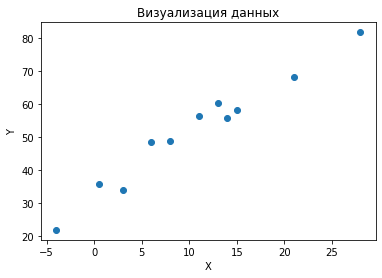

In [14]:
plt.scatter(x_data, y_data)
plt.title("Визуализация данных")
plt.xlabel("X")
plt.ylabel("Y")

*Предположим, что простая линейная модель здесь подойдет*

## Предобработка данных

In [15]:
x_data = torch.tensor(x_data)
y_data = torch.tensor(y_data) 

Для подавляющего большинства моделей машинного обучения - данные необходимо нормировать.

Для этого произведем стандартизацию данных:

In [16]:
def standartization(x: torch.Tensor) -> torch.Tensor:
    """
    Perofrms data standartization by the following formula:
    data = (data - mean(data)) / std(data)
    """
    return (x - x.mean()) / x.std()

In [17]:
x_ndata = standartization(x_data)
y_ndata = standartization(y_data)

In [18]:
x_ndata, y_ndata

(tensor([-1.0856,  0.3800,  0.4885,  1.8998,  0.0543, -0.2714, -0.8142, -1.5741,
         -0.4885,  0.2714,  1.1399]),
 tensor([-0.9565,  0.2436,  0.3802,  1.7883,  0.2673, -0.1723, -1.0635, -1.7823,
         -0.2020,  0.5109,  0.9862]))

## Модель

In [19]:
def model(x, w, b):
    """
    :param x: input
    :param w: weights
    :param b: bias
    """
    return w * x + b

## Функция ошибки

In [20]:
def loss_fn(x, y):
    """
    Calculates mean squared error (MSE)
    """
    loss = (x - y) ** 2
    return loss.mean()

## Инициализация параметров модели

In [21]:
# params[0] - weights, params[1] - bias
params = torch.tensor([1.0, 0.0], requires_grad=True)  

Здесь впервые мы встречаем такой параметр, как `requires_grad`. Данный параметр отсылает нас к ключевой части `pytorch`, называемой `autograd`. `autograd` это система автоматического дифференциирования, основанная на вычислительных графах. Так, выполняя различные операции над тензорами, `pytorch` автоматически создаёт граф выполненных операций, благодаря которому он может также автоматически вычислять градиент функции по заданным переменным применяя *правило дифференциирования сложной функции*. 

Для более подробной информации, Вы можете обратиться к следующим источникам:

[__Pytorch.autograd official documentation__](https://pytorch.org/docs/stable/notes/autograd.html)

[Official tutorial about autograd](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)

[__Pytorch graph explanation__](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)

In [22]:
# Пока не было выполнено никаких операций над параметрами - их градиент не существует
print("params.grad is None: ", params.grad is None)

params.grad is None:  True


In [23]:
loss = loss_fn(model(x_ndata, *params), y_ndata)
loss.backward()  # Функция которая вычисляет градиент ошибки

# Если вы запустите данную клетку несколько раз - градиент будет накапливаться, а граф продолжать строиться 
params.grad

tensor([3.4838e-02, 2.6450e-07])

Значения градиента можно лего очистить

In [24]:
if params.grad is not None:
    params.grad.zero_()  # вызовы метода zero_ с нижним подчеркиванием выполняет операцию in-place
params.grad

tensor([0., 0.])

## Напишем тренировочный цикл

In [25]:
def training_loop(n_epochs: int, learning_rate: float, params: torch.Tensor, x: torch.Tensor, y: torch.Tensor):
    """
    :param n_epochs: number of training epochs
    :param learning_rate: learning rate of the model (multiplied on loss' gradient)
    :param x: model's input
    :param y: labels
    """
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        # Forward pass
        preds = model(x, *params) 
        # Вычисление функции ошибки
        loss = loss_fn(preds, y)
        # Вычисление градиента (backward pass)
        loss.backward()
        
        # Контекст внутри которого градиент не вычисляется
        with torch.no_grad():  
            # Изменение параметров модели
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

## Решение задачи

In [26]:
%%time
resulted_model_params = training_loop(
                            n_epochs = 5000, 
                            learning_rate = 1e-2, 
                            params = torch.tensor([1.0, 0.0], requires_grad=True),
                            x = x_ndata,
                            y = y_ndata)

Epoch 500, Loss 0.034504
Epoch 1000, Loss 0.034504
Epoch 1500, Loss 0.034504
Epoch 2000, Loss 0.034504
Epoch 2500, Loss 0.034504
Epoch 3000, Loss 0.034504
Epoch 3500, Loss 0.034504
Epoch 4000, Loss 0.034504
Epoch 4500, Loss 0.034504
Epoch 5000, Loss 0.034504
CPU times: user 455 ms, sys: 9.66 ms, total: 464 ms
Wall time: 461 ms


In [27]:
resulted_model_params

tensor([ 9.8084e-01, -1.3467e-07], requires_grad=True)

### Визуализируем решение

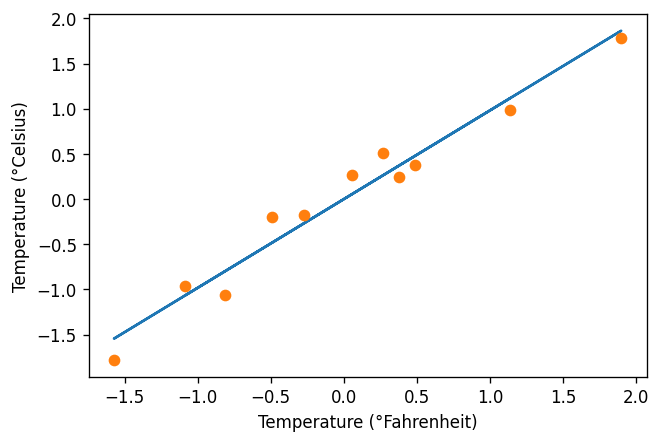

In [28]:
preds = model(x_ndata, *resulted_model_params)

fig = plt.figure(dpi=120)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(x_ndata.numpy(), preds.detach().numpy())
plt.plot(x_ndata.numpy(), y_ndata.numpy(), 'o')

*`detach()` - метод, который возвращает **новый** тензор, **не являющийся** частью вычислительного графа*

Как можно увидеть из полученного рисунка - мы нашли одно из возможны решений. 

Исходные данные представляли собой значения температуры в градусах цельсия и по фаренгейту. 

# Вычисление на GPU

Вероятнее всего, говоря о вычислении на GPU - в качестве GPU будет использовано устройство компании Nvidia. Тогда, для проверки доступности GPU можно воспользоваться командой `nvidia-smi`

In [29]:
!nvidia-smi

Fri Feb 18 10:26:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:17:00.0 Off |                  N/A |
| 27%   32C    P8     6W / 250W |   9954MiB / 11016MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:B3:00.0 Off |                  N/A |
| 33%   

Как можно увидеть из вывода команды - сейчас в ноутбуке доступны две видеоакрты, однако GPU с `id=0` занят. Для того чтобы `pytorch` выполнял вычисления на GPU необходимо просто перенести на GPU данные использовав метод `.to()`

In [30]:
device = 'cpu'  # Обычно pytorch выполняет вычисление на CPU если не указать ему обратного
device = 'cuda:1'  # 1 == использовать GPU с ID=1

In [31]:
x_ndata = x_ndata.to(device)
y_ndata = y_ndata.to(device)

Теперь вычисления будут выполнены на GPU, однако в такой простой задаче мы увидим лишь замедленее

In [32]:
%%time
resulted_model_params = training_loop(
                            n_epochs = 5000, 
                            learning_rate = 1e-2, 
                            params = torch.tensor([1.0, 0.0], requires_grad=True, device=device),
                            x = x_ndata,
                            y = y_ndata)

Epoch 500, Loss 0.034504
Epoch 1000, Loss 0.034504
Epoch 1500, Loss 0.034504
Epoch 2000, Loss 0.034504
Epoch 2500, Loss 0.034504
Epoch 3000, Loss 0.034504
Epoch 3500, Loss 0.034504
Epoch 4000, Loss 0.034504
Epoch 4500, Loss 0.034504
Epoch 5000, Loss 0.034504
CPU times: user 2.92 s, sys: 125 ms, total: 3.04 s
Wall time: 2.98 s


# Нейронные сети

Чаще всего `pytorch` применяют для создание и обучения нейросетевых моделей. Рассмотрим то, как `pytorch` помогает программистам создавать модели нейронных сетей, загружать и обрабатывать данные, обучать нейронные сети.

Далее, будем исходить из предположения, что Вы знакомы с базами нейросетевых алгоритмов, со сверточными нейронными сетями.

## Построение модели

Начнем с построения архитектуры простейшей сверточной сети. В их основе лежат так называемые `сверточные(convolutional)` слои. Большинство, часто используемых слоёв, уже реализованы в модуле `pytorch.nn`.

Для построения моделей `pytorch` предлагает два инструмента: 
 * `torch.nn.Sequential`
 * `torch.nn.Module`
 
Это не взаимоисключающие варианты, как правило они используются совместно

### Пример с перцептроном
#### nn.Sequential

In [33]:
model = nn.Sequential(
    nn.Linear(1, 11),  # Input
    nn.ReLU(),  # Activation
    nn.Linear(11, 1)  # Output
)
model

Sequential(
  (0): Linear(in_features=1, out_features=11, bias=True)
  (1): ReLU()
  (2): Linear(in_features=11, out_features=1, bias=True)
)

#### nn.Module

In [34]:
class Model(nn.Module):
    def __init__(self, n_classes: int = 3, dim: int = 2, n_features = 100):
        super().__init__()
        
        self.in_layer = nn.Linear(dim, n_features)
        self.hidden_layer = nn.Linear(n_features, n_features)
        self.out_layer = nn.Linear(n_features, n_classes)
        
    def forward(self, x):
        hx = self.in_layer(x)
        hx = torch.relu(hx)
        hx = self.hiddent_layer(hx)
        hx = torch.relu(hx)
        out = self.out_layer(hx)

        return torch.sigmoid(out)

In [35]:
model = Model()
model

Model(
  (in_layer): Linear(in_features=2, out_features=100, bias=True)
  (hidden_layer): Linear(in_features=100, out_features=100, bias=True)
  (out_layer): Linear(in_features=100, out_features=3, bias=True)
)

#### Combination

In [36]:
class ConvBnRelu(nn.Module):
    """
    Полезная статья о слое "Батч нормализации"
    https://arxiv.org/pdf/1502.03167.pdf
    
    Conv Layer -> BatchNorm Layer -> Activation Layer
    """
    
    def __init__(self, in_f, out_f, activation=torch.relu):
        super().__init__()
        
        self.conv = nn.Conv2d(in_f, out_f, kernel_size=3)
        self.bn = nn.BatchNorm2d(out_f)
        self.activation = activation
        
    def forward(self, x):
        hx = self.conv(x)
        hx = self.bn(hx)
        return self.activation(hx)


class Model(nn.Module):
    def __init__(self, n_classes: int = 3, n_features = 16):
        super().__init__()
        
        self.in_layer = ConvBnRelu(3, n_features)
        # 5 подряд идущих блоков
        self.hidden_layers = nn.Sequential(*[ConvBnRelu(n_features, n_features) for _ in range(5)])
        self.flatten = nn.Flatten()
        self.out_layer = nn.Linear(n_features * n_features, n_classes)
        
    def forward(self, x):
        hx = self.in_layer(x)
        for l in self.hidden_layers:
            hx = l(hx)
        hx = self.flatten(hx)
        print(hx.shape)
        out = self.out_layer(hx)

        return torch.sigmoid(out)

In [37]:
model = Model()
model

Model(
  (in_layer): ConvBnRelu(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden_layers): Sequential(
    (0): ConvBnRelu(
      (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ConvBnRelu(
      (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): ConvBnRelu(
      (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): ConvBnRelu(
      (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): ConvBnRelu(
      (conv): Conv2d(16, 16,

Проверим что наша модель работает

In [38]:
# Входной тензор имеет размерности
# [N, C, H, W] 
# N - размер батча
# C - количество каналов
# H, W - размеры изображения
model(torch.rand(1, 3, 16, 16))  

torch.Size([1, 256])


tensor([[0.6587, 0.4338, 0.2949]], grad_fn=<SigmoidBackward>)

# Работа с данными

## Собственный набор данных

Для работы с собственными наборами данных pytorch предлагает реализовать один из двух классов: `Dataset` или `IterableDataset`.
Хорошо и подробно работу с данными классами описали в документации `pytorch`.

* https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
* https://pytorch.org/docs/stable/data.html
* https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

Если говорить о различиях данных классов - то `Dataset` можно использовать в случаях, когда весь набор данных имеет фиксированный размер, а `IterableDataset` в случаях когда набор данных можно представить в виде бесконечного потока данных (например данные генерируются на лету).

Так как наш набор данных имеет фиксированный размер - мы можем реализовать класс `Dataset`.

*C классом `IterableDataset` нужно быть аккуратным, т.к. его использование может привести к большому расходу оперативной памяти*

Для того что бы создать свой класс `Dataset` необходимо реализовать два метода - <code>\_\_len\_\_</code> и <code>\_\_getitem\_\_</code>

In [39]:
class RandomDataset(torch.utils.data.Dataset):
    def __init__(self, n_features: int = 2, n_samples: int = 100):
        self.n_classes = 3
        self.n_samples = n_samples
        self.n_features = n_features
        self.x_data, self.y_data = None, None
        self._generate_data()

    def _generate_data(self):
        X1 = np.random.randn(self.n_samples, self.n_features) + np.array([0, 2])
        X2 = np.random.randn(self.n_samples, self.n_features) + np.array([-2, 2])
        X3 = np.random.randn(self.n_samples, self.n_features) + np.array([-2, 0])
        self.x_data = np.vstack([X1, X2, X3]).astype(np.float32)

        self.y_data = np.array([0] * self.n_samples + [1] * self.n_samples + [2] * self.n_samples)
        self.y_data = np.array(self.y_data, dtype=np.int64)
        
    def __len__(self):
        return len(self.y_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

## Набор данных из torchvision

`pytorch` предоставляет большие возможности по работе с данным: чтение, аугментация, параллельные загрузчики и прочее. (часть из этой функциональности представляет [`torchvision`]((https://pytorch.org/vision/stable/index.html)))

Далее для демонстрации воспользуемся набором данных [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), он также доступен из `pytorch`, а именно из его дополнительной библиотеки [`pytorchvision`](https://pytorch.org/vision/stable/index.html)

Наборы данных из `torchvision.datasets` можно использовать сразу, т.е. они уже реализуют класс `Dataset`

In [40]:
dataset = torchvision.datasets.FashionMNIST(root='./data', download=True)

In [41]:
# Каждый элемент набора данных - это кортеж (изображение, метка)
# Изображение - класс PIL.Image
img, label = dataset[1]  
img.show()  # У него есть метод show() 

### Аугментация данных

Аугментация данных важный шаг при работе с нейронными сетями. Данный шаг позволяет искусственно улучшить разнообразие данных, что положительно сказывается на обобщающей способности нейронных сетей. 

Для аугментации данных в `torchvision` есть ряд реализованных классов. Для того чтобы создать последовательность функий выполняющих аугментацию данных можно использовать обертку `torchvision.transforms.Compose`

In [42]:
from torchvision import transforms

In [43]:
augmentation = transforms.Compose([
    transforms.RandomRotation((-30, 30)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

**Будьте очень внимательны с методом ToTensor(), у него есть side-effects, он не только преобразует данные в тип torch.tensor, но еще и переставляет каналы и производит нормировку**

https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html

In [44]:
dataset = torchvision.datasets.FashionMNIST(
    root='./data', 
    download=False, 
    train=True,
    transform=augmentation
)

### DataLoader
`DataLoader` это класс, который "передаёт" данные в нейронную сеть. Он позволяет формировать минибатчи данных (причем параллельно). Чаще всего именно из-за этапа подготовки данных нейронные сети обучаются медленно, поэтому важно уметь правильно работать с данным классом. 

In [45]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

In [46]:
# проверим что он работает
test = next(iter(dataloader))
test

[tensor([[[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
            -1.0000, -

In [47]:
test[0][0].shape

torch.Size([1, 28, 28])

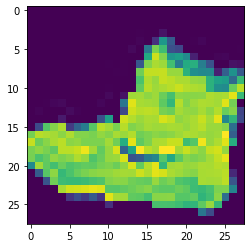

In [48]:
plt.imshow(test[0][0, 0].numpy())

In [49]:
test[0][0, 0].numpy().max()

1.0

## Тренировочный цикл
К сожалению из коробки в `pytorch` нету никаких классов или методов позволяющих сразу начать обучение нейронной сети. Существует необходимость самостоятельно писать тренировочный цикл.

In [50]:
import datetime
from tqdm import tqdm

def training_loop(n_epochs, optimizer, model, loss_fn, dataloader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        model.train()
        for X, y in tqdm(dataloader):
            # Перенесём данные на выбранное устройство (в нашем случае на GPU)
            X = X.to(device=device)
            y = y.to(device=device)
            
            # Очистим значения градиентов
            optimizer.zero_grad()
            pred = model(X)
            loss = loss_fn(pred, y)
            
            # Вычисление градиентов
            loss.backward()
            # Данный метод выполняет изменение параметров модели 
            optimizer.step()

            loss_train += loss.item()
        
        # Тестирование модели
        if epoch == 1 or epoch % 2 == 0:
            model.eval()
            with torch.no_grad():
                size = len(dataloader.dataset)
                correct = 0
                for X, y in dataloader:
                    X = X.to(device=device)
                    y = y.to(device=device)
                    pred = model(X)
                    correct += (pred.argmax(dim=1) == y).type(torch.float).sum().item()
                acc = correct / size

            print('{} Epoch {}, Training loss {}, Accuracy {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(dataloader), acc))

## Функция ошибки, оптимизатор, предобученные модели и запуск обучения

Наиболее популярные функции ошибок реализованы в `pytorch`. В случае острой необходимости использовать функцию ошибки, которой нет в составе `pytorch`? не составляет никаких проблем реализовать её, либо что еще проще - найти реализацию на *github*, не зря `pytorch` один из самых популярных фреймворков.

Например в следующем репозитории находится большое множество реализованных функций ошибок, которых нет в `pytorch`
https://github.com/CoinCheung/pytorch-loss

In [51]:
loss_fn = nn.CrossEntropyLoss()

Не забудем про данные

In [52]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1024, shuffle=True, num_workers=4)

Для проверки того, что всё работает воспользуемся моделью Resnet-18 которая доступна в `torchvision`. К сожалению интерфейс метода возвращающего модель resnet18 не предусматривает изменение конфигурации сети. Данные сети обучались на наборе данных ImageNet и принимали на вход трехканальные (RGB) изображения. Однако в нашем случае мы имеем дело с изображениями в градациях серого (gray-scale изображения). Для того чтобы иметь возможность работать с такими изображениями заменим первый слой. Кроме того необходимо заменить и последний слой сети, т.к. он расчитан на 1000 классов, когда в нашем случае мы работает с 10.

```python
>>> torchvision.models.resnet18(pretrained=False)
<<< ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
    ....
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=512, out_features=1000, bias=True)
)
```


In [53]:
torchvision.models.resnet18(pretrained=False)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [54]:
class Resnet18(nn.Module):
    def __init__(self, n_channels: int = 1, n_classes: int = 10):
        super().__init__()
        self.resnet = torchvision.models.resnet18(pretrained=False)
        # Заменим первую свертку
        self.resnet.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=64, kernel_size=7, stride=2, padding=3, bias=False)
        # Заменим последний слой
        self.resnet.fc = nn.Linear(in_features=self.resnet.fc.in_features, out_features=n_classes)
    
    def forward(self, x):
        hx = self.resnet(x)
        return hx


In [55]:
# Всё работает
Resnet18()(torch.rand(2, 1, 32, 32))  # (N, C, H, W)

tensor([[-0.4720,  0.6760, -0.0365, -0.7455, -1.2141, -0.2653, -0.9146, -0.3123,
          0.7655,  0.7139],
        [-0.8733,  0.8039,  0.0732, -0.2995, -0.4035, -0.3375, -0.4560, -0.4234,
          0.8615,  0.0519]], grad_fn=<AddmmBackward>)

In [56]:
model = Resnet18().to(device)

В `pytorch` реализованы все стандартные оптимизаторы градиентного спускуа. Все они в качестве первого аргумента принимают обучаемые параметры модели

In [57]:
optimizer = optim.Adam(model.parameters())

Запустим обучение

In [58]:
training_loop(
    n_epochs = 20,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    dataloader = dataloader,
)

  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:26:30.824785 Epoch 1, Training loss 0.5999123060097129, Accuracy 0.8093833333333333


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:26:38.416126 Epoch 2, Training loss 0.4060952921034926, Accuracy 0.8469333333333333


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:26:50.867078 Epoch 4, Training loss 0.3367523328732636, Accuracy 0.8700833333333333


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:27:03.469030 Epoch 6, Training loss 0.3045702253357839, Accuracy 0.8882333333333333


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:27:16.123141 Epoch 8, Training loss 0.280461324978683, Accuracy 0.888


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:27:28.742119 Epoch 10, Training loss 0.26689335754362203, Accuracy 0.8958333333333334


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:27:41.503847 Epoch 12, Training loss 0.2522923726651628, Accuracy 0.8923166666666666


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:27:54.201425 Epoch 14, Training loss 0.237063892059407, Accuracy 0.9082333333333333


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:28:06.941334 Epoch 16, Training loss 0.2283385012109401, Accuracy 0.9144666666666666


  0%|          | 0/59 [00:00<?, ?it/s]

2022-02-18 10:28:19.733618 Epoch 18, Training loss 0.21975408267166655, Accuracy 0.91275


100%|██████████| 59/59 [00:05<00:00, 11.62it/s]


2022-02-18 10:28:32.506316 Epoch 20, Training loss 0.2147333185046406, Accuracy 0.91985


Так мы смогли успешно обучить нейронную сеть используя библиотеку `pytorch`. Теперь у вас есть все необходимые навыки для начала работы с ним.

На данном этапе можно заметить, что мы каждый раз вручную писали собственный тренировочный цикл, это неудобно, особенно если каждый раз вручную его настраиваеть, добавлять этапы валидации, тестирования, вычисления метрик и логгирования. Для того, чтобы упростить себе жизнь и ускорить проведение экспериментов - есть библиотека `pytorch_lightning`. О том как применять данную библиотеку вы можете узнать из файла `pytorch_lightning_basics.ipynb`.

# Преимущества и недостатки `pytorch`

\+ В настоящее время `pytorch` очень популярен в исследовательских задачах

\+ Прост в использовании и гибок

\+ Имеет большое сообщество

---

\- Медленнее чем другие библиотеки (например `Tensorflow`), однако при должных знаниях `pytorch` это исправимый недостаток.

\- Плохая документация (некоторые функции слабо задокументированы)

\- Плохое логгирование ошибок (это связано с особенностями работы `pytorch`, для того чтобы видеть полный stack-trace ошибок необходимо установить значение переменной `CUDA_LAUNCH_BLOCKING=1`)
